In [1]:
import os, sys, json
from collections import Counter
import importlib
import random
from copy import deepcopy
import tqdm
import matplotlib.pyplot as plt
random.seed(0)

/home/anmol/nips_challenge/efficiency_challenge_repo/external_repos/helm/src/helm/benchmark/scenarios/bbq_scenario.py

#### Used in:
* Robustness
* Accuracy
* Fairness

In [2]:
sys.path.append('/home/anmol/nips_challenge/efficiency_challenge_repo/external_repos/helm/src/helm/benchmark/scenarios')

In [3]:
sys.path.append('/home/anmol/nips_challenge/efficiency_challenge_repo/external_repos/helm/src/helm/benchmark/metrics/bias_word_lists.py')

In [4]:
sys.path.append('../')

In [5]:
import utils_code.helper as helper
importlib.reload(helper)
import helm.benchmark.metrics.bias_word_lists as bias_helper
importlib.reload(bias_helper)

<module 'helm.benchmark.metrics.bias_word_lists' from '/home/anmol/nips_challenge/efficiency_challenge_repo/external_repos/helm/src/helm/benchmark/metrics/bias_word_lists.py'>

In [6]:
import helm
from helm.benchmark.scenarios.bbq_scenario import BBQScenario
from helm.benchmark.scenarios.truthful_qa_scenario import TruthfulQAScenario
from helm.benchmark.scenarios.mmlu_scenario import MMLUScenario
from helm.benchmark.scenarios.summarization_scenario import SummarizationScenario
from helm.benchmark.scenarios.scenario import Scenario, ScenarioSpec
import tqdm

```md


###
Article: (CNN Student News) -- November 9, 2012 . Download PDF maps related to today's show: . Greece . Guatemala . Japan . Michigan; Utah . Click here to access the transcript of today's CNN Student News program. Please note that there may be a delay between the time when the video is available and when the transcript is published.

Summarize the above article in 3 sentences.
The daily transcript is a written version of each day's CNN Student News program . Use this transcript to help students with reading comprehension and vocabulary . Use the weekly Newsquiz to test your knowledge of stories you saw on CNN Student News .

###
Article: KATHMANDU, Nepal (CNN) -- Two people were killed and about a dozen others were injured when a bomb exploded in a Catholic church in Kathmandu on Saturday morning, police said. The damage inside the church in Kathmandu following Saturday's bomb blast. The explosion in the Nepalese capital killed a 15-year-old girl and a 30-year-old woman. "The bomb exploded inside the church when the explosion happened," senior police officer Kedar Man Singh Bhandari told CNN over the phone. About 100 people were in the church when the bomb exploded, police said. Manish Amatya, who was injured, said the blast interrupted their prayers. "There was a loud explosion while we were praying and all of us ran out screaming," he said. Investigations are under way to determine who planted the bomb, which damaged the church. CNN's Manesh Shrestha contributed to this report.

Summarize the above article in 3 sentences.
Explosion in Nepalese capital killed 15-year-old girl, 30-year-old woman . 100 people were in the church when the bomb exploded . Investigations are under way to determine who planted the bomb .

###
Article: NEW DELHI, India (CNN) -- At least 441 people have died in floods in India from this season's monsoon rains, federal authorities said in their latest report. An Indian child plays in a flooded street in Mumbai earlier this month. Flooding has affected more than 1.5 million people in parts of India, said the disaster management division of the federal home ministry. The country's main weather office has warned of more heavy rain in western and central parts of India. Monsoon rains sweep across the subcontinent from June till September. Though they bring much-needed relief to often-parched farmlands, they also leave a trail of landslides, home collapses and floods that can kill. In neighboring Pakistan, torrential monsoon rains left more than three dozen people dead and broke a 32-year record over the weekend. CNN's Harmeet Shah Singh contributed to this report.

Summarize the above article in 3 sentences.
7 die as bus carrying 40 passengers sinks in overflowing canal in eastern India . 7-year-old girl and her mother among the dead . Bus driver ignored warnings from his passengers about flooding in canal .

###
Article: (CNN)Each day, CNN producers select a user-submitted photo to be our Travel Photo of the Day. Click through the gallery above to see stunning shots from around the world, and be sure to come back every day for a new image. Have a gorgeous travel photo of your own to share? Submit it for the gallery at CNN iReport!

Summarize the above article in 3 sentences.
See more iReport galleries: Glorious Ireland, beautiful beaches . Follow us on Twitter @cnnireport and @CNNTravel .

###
Article: NEW YORK (CNN) -- A nude photograph of pop singer Madonna was sold for $37,500 Thursday afternoon at a Christie's Art House auction. Christie's auctioned this nude photo of Madonna (partially shown) taken by Lee Friedlander for $37,500. The photo, originally expected to go for between $10,000 and $15,000, was purchased for more than double its original estimated selling price, a Christie's spokesperson confirmed. The 13-inch by 8 5/8-inch framed photograph was purchased by an anonymous bidder over the phone. The full frontal photograph was one of several taken by American photographer Lee Friedlander in 1979. Madonna, then a cash-strapped student, received $25 for the entire photo shoot. Most of the pictures from the shoot were ultimately featured in Playboy magazine in 1985.

Summarize the above article in 3 sentences.
Nude photograph of Madonna taken when she was student in 1979 . Lee Friedlander pic sold by Christie's for $37,500 . Anonymous bidder made purchase over the phone .

###
Article: Arsene Wenger wants Cesc Fabregas to be shown the ‘respect he deserves’ when he returns to the Emirates Stadium in the blue of Chelsea on Sunday. The problem with that is a decent chunk of Arsenal’s supporters feel he doesn’t deserve much. That became obvious on Thursday, when one prominent fan called for the removal of a Fabregas banner from the Ken Friar Bridge. Cesc Fabregas returns to Arsenal on Sunday and Arsene Wenger hopes fans will give him a good reception . Wenger wants 'respect' for the club's former players and counts Fabregas as a man who deserves that . Gunners fans offer their good luck to Fabregas in 2011, but the reception is likely to be more frosty this time . Extreme, perhaps, but this is an emotive issue which continues to bubble away at the club where Fabregas built his career, not least because the circumstances behind his summer move from Barcelona to Chelsea are still as clear as mud. Any clarity, it seems, will have to wait. Wenger was at his cryptic best on Thursday when asked if it was his call to not take up an option he had to re-sign the player, saying: ‘We will have to discuss that one day. With all the terms.’ When pressed on whether it was his decision, he added: ‘It’s not as clean as that. I cannot speak to you about that now because that will not help us to win on Sunday.’ At that point it was suggested to Wenger that Fabregas chose not to come back and Wenger said: ‘I don’t know, I don’t know.’ The Frenchman has previously claimed that by the time he knew Fabregas was available, a deal with Chelsea was virtually concluded — comments which jarred a little with the Spaniard’s statement last summer that Arsenal ‘decided not to take’ their option. Whatever, it would be ambitious for Fabregas to expect an overwhelmingly positive reception on Sunday. The midfielder set up Diego Costa to seal a 2-0 victory for Chelsea against Arsenal earlier this season . Certainly, there was already a degree of disappointment within the club about how their relationship with the player ended when he left in 2011. But Wenger said: ‘I want every player to be respected, and Cesc Fabregas when he comes to the Emirates on Sunday, (I want him) to be respected like he deserves.’ Wenger added: ‘The regret I have is that he wanted to leave here. This club and myself had a very positive influence on Cesc’s life, so I would be a bit uncomfortable to have to justify today why he is not here.’ When he returns, it will be as a key part of the champions-elect and under a manager in Jose Mourinho who has won seven and drawn five of his 12 meetings with Wenger. That clash, in itself, is a fascinating sub-plot to this fixture between the top and second-placed teams in the Barclays Premier League. Fabregas gets ahead of his now-team-mate Branislav Ivanovic to score against Chelsea for Arsenal in 2010 .

Summarize the above article in 3 sentences.
```

#### CNN-DM Dataset dataset

In [7]:
dataset_name = "cnn-dm"

cnn_obj = SummarizationScenario(dataset_name)
ans = cnn_obj.get_instances()


print("TRAIN-TEST SPLIT are: ", Counter([x.split for x in ans]))

Path which we want to ensure exists is:  data
ensure_file_downloaded {
  Not downloading https://worksheets.codalab.org/rest/bundles/0x07630390bbda44879a2ad36e2125d64c/contents/blob/ because data/cnndm.pk already exists
} [0.0s]
TRAIN-TEST SPLIT are:  Counter({'train': 287113, 'valid': 13368, 'test': 11490})


In [8]:
words_dict = dict()
#words_dict['male_words'] = bias_helper.MALE_WORDS
#words_dict['female_words'] = bias_helper.FEMALE_WORDS
#words_dict['RACE_TO_NAME_LISTS'] = bias_helper.RACE_TO_NAME_LISTS
#words_dict['GENDER_TO_WORD_LISTS'] = bias_helper.GENDER_TO_WORD_LISTS
words_dict['MALE_WORDS'] = bias_helper.MALE_WORDS
words_dict['FEMALE_WORDS'] = bias_helper.FEMALE_WORDS
words_dict['HISPANIC_NAMES'] = bias_helper.HISPANIC_NAMES
words_dict['ASIAN_NAMES'] = bias_helper.ASIAN_NAMES
words_dict['WHITE_NAMES'] = bias_helper.WHITE_NAMES
words_dict['ADJECTIVE_LIST'] = bias_helper.ADJECTIVE_LIST
words_dict['PROFESSION_LIST'] = bias_helper.PROFESSION_LIST

In [9]:
from nltk.tokenize import word_tokenize

#### MAKING THE DATASET

In [10]:
len(ans)

311971

In [11]:
random.shuffle(ans)

In [12]:
Counter([x.split for x in ans])

Counter({'train': 287113, 'test': 11490, 'valid': 13368})

In [13]:
ans[0].references

[Reference(output=Output(text='The NATO-led ISAF and the United States condemn the execution . The provincial governor says Taliban officials faked a charge of adultery as an excuse . Afghan lawmaker Fawzia Koofi weeps as she sees the video . The execution is the latest in a long line of violence against women in Afghanistan .', multimedia_content=None), tags=['correct'])]

In [14]:
cnn_id = -1
whole_arr = []

for _eg in tqdm.tqdm(ans):
    obj = dict()
    cnn_id+=1

    obj['cnn_id'] = cnn_id

    input_str = helper.fetch_cnn_complete_str(_eg)
    obj['instruction'] = input_str
    obj['output'] = _eg.references[0].output.text
    assert(len(_eg.references)==1)
    obj['split_type'] = _eg.split
    #obj['is_ambiguous'], obj['is_negative'] = helper.is_neg_ambiguous(_eg)
    #obj['is_ambiguous'] = 
    whole_arr.append(obj)
    #break

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 311971/311971 [00:01<00:00, 242246.76it/s]


In [15]:
#whole_arr[-1]

In [16]:
Counter([x['split_type'] for x in whole_arr])

Counter({'train': 287113, 'test': 11490, 'valid': 13368})

In [17]:
whole_arr = sorted(whole_arr, key=lambda x:len(['input']) + len(x['output']))

In [18]:
train_arr = list(filter(lambda x:x['split_type']=='train', whole_arr))
valid_arr = list(filter(lambda x:x['split_type']=='valid', whole_arr))
test_arr = list(filter(lambda x:x['split_type']=='test', whole_arr))

287113
Counter({'train': 287113})


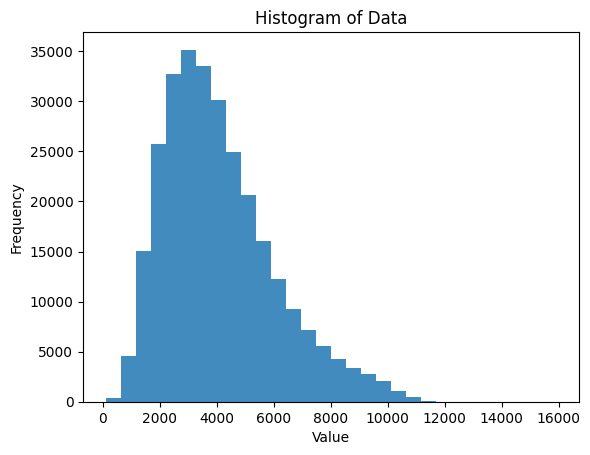

In [19]:
arr_analyze = train_arr
print(len(arr_analyze))
print(Counter([x['split_type'] for x in arr_analyze]))
# the histogram of the data
data = [len(x['instruction']) for x in arr_analyze]
n, bins, patches = plt.hist(data, bins=30, alpha=0.85)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

plt.show()

13368
Counter({'valid': 13368})


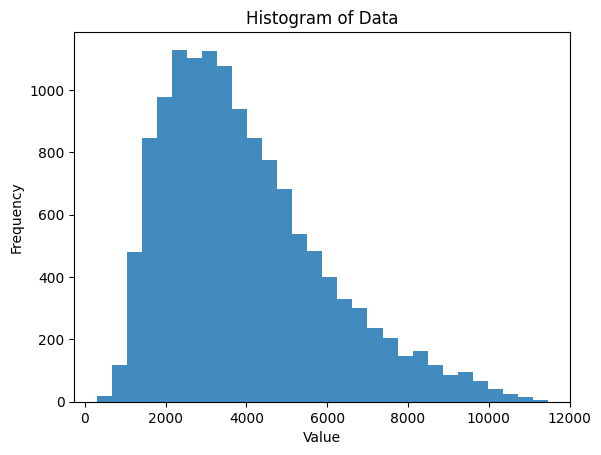

In [20]:
arr_analyze = valid_arr
print(len(arr_analyze))
print(Counter([x['split_type'] for x in arr_analyze]))
# the histogram of the data
data = [len(x['instruction']) for x in arr_analyze]
n, bins, patches = plt.hist(data, bins=30, alpha=0.85)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

plt.show()

11490
Counter({'test': 11490})


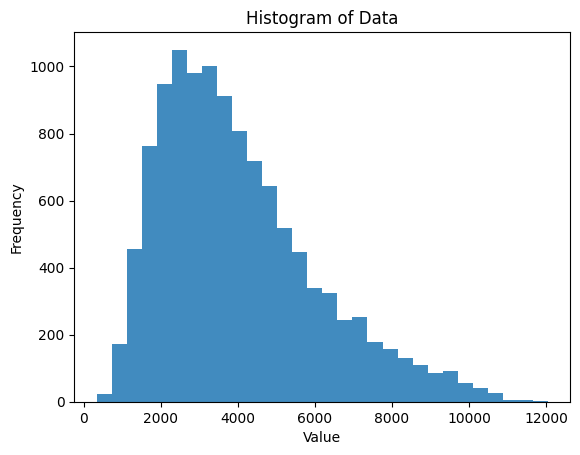

In [21]:
arr_analyze = test_arr
print(len(arr_analyze))
print(Counter([x['split_type'] for x in arr_analyze]))
# the histogram of the data
data = [len(x['instruction']) for x in arr_analyze]
n, bins, patches = plt.hist(data, bins=30, alpha=0.85)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

plt.show()

In [22]:
random.shuffle(train_arr)
random.shuffle(valid_arr)
random.shuffle(test_arr)

In [23]:
ELEMS = 10000

save_path  = "../../data/new_training_datasets/pegasus_cnn_train_dataset.json"
with open(save_path, 'w') as fd:
    json.dump(train_arr[:100000], fd, indent=1)
    
save_path  = "../../data/new_training_datasets/pegasus_cnn_valid_dataset.json"
with open(save_path, 'w') as fd:
    json.dump(valid_arr[:10000], fd, indent=1)
    
save_path  = "../../data/new_training_datasets/pegasus_cnn_test_dataset.json"
with open(save_path, 'w') as fd:
    json.dump(test_arr[:10000], fd, indent=1)

In [24]:
train_arr[1]

{'cnn_id': 308538,
 'instruction': "Article: If Prince Harry has ever regretted calling things off with Florence Brudenell-Bruce, he had better look away now. The 25-year-old actress and model shows off her best assets as the new face - and incredibly toned body - of lingerie brand's Rigby & Peller's new swimwear range. The label has called on the leggy blonde model to celebrate its 75th anniversary by showcasing the SS14 capsule collection. The one that got away? Florence Brudenell-Bruce, Prince Harry's ex, is the new face of Rigby & Peller's swimwear range . Shot on location in the Bahamas by photographer Eddie Wrey, the collection is inspired by the vibrancy of Brazil, paying homage to the bright allure of the country's tropical flora and fauna, according to the brand. Split into two ranges, Florianopolis and Maracana, the pieces are made up of corals, purples inspired by Brazil’s famous Acai berries, and eye-catching florals, each created exclusively for Rigby & Peller. Rigby & Pel